In [238]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import math
import re
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
# Apply the default theme
sns.set_theme()
# read the data
movie_column_l = ['id', 'title', 'genre']
df = pd.read_table('movies.dat', sep='::', header=None, names=movie_column_l, engine='python')
pd.options.display.max_columns = None

In [239]:
# New palette 
sns.color_palette("hls",8)


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [240]:
# Stablish new palette 
sns.set_theme(palette="hls")

# Exercise 2 and 3

## Exploring data

In [241]:
df.head()

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3883 non-null   int64 
 1   title   3883 non-null   object
 2   genre   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


There are not missing values

In [243]:
# Looking for duplicates
df.duplicated().sum()

0

There are not duplicated values 

In [244]:
#Extract year and create a new column year
pattern = r"\(([1-2][0-9][0-9][0-9])\)"
df["year"] = df["title"].apply(lambda x: int(re.search(pattern, x).group(1)))
df.head()


,id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [245]:
#Erase year of title
pattern = r" +\(.*\)"
df["title"] = df["title"].apply(lambda x: re.sub(pattern, "", x))
df.head()

,id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [246]:
# Count films per year absolute number
a=df[['year']].value_counts().rename_axis('year').reset_index(name='counts')
a

,year,counts
0,1996,345
1,1995,342
2,1998,337
3,1997,315
4,1999,283
...,...,...
76,1923,3
77,1919,3
78,1920,2
79,1922,2


In [247]:
df.describe()

,id,year
count,3883.000000,3883.000000
mean,1986.049446,1986.066959
std,1146.778349,16.895690
min,1.000000,1919.000000
25%,982.500000,1982.000000
50%,2010.000000,1994.000000
75%,2980.500000,1997.000000
max,3952.000000,2000.000000


In [248]:
# Count films per year %
b=df[['year']].value_counts(normalize=True)
b

year
1996    0.088849
1995    0.088076
1998    0.086789
1997    0.081123
1999    0.072882
          ...   
1923    0.000773
1919    0.000773
1920    0.000515
1922    0.000515
1921    0.000258
Length: 81, dtype: float64

In [249]:
c=df[['year']].describe()
c

,year
count,3883.000000
mean,1986.066959
std,16.895690
min,1919.000000
25%,1982.000000
50%,1994.000000
75%,1997.000000
max,2000.000000


## Numerical variable

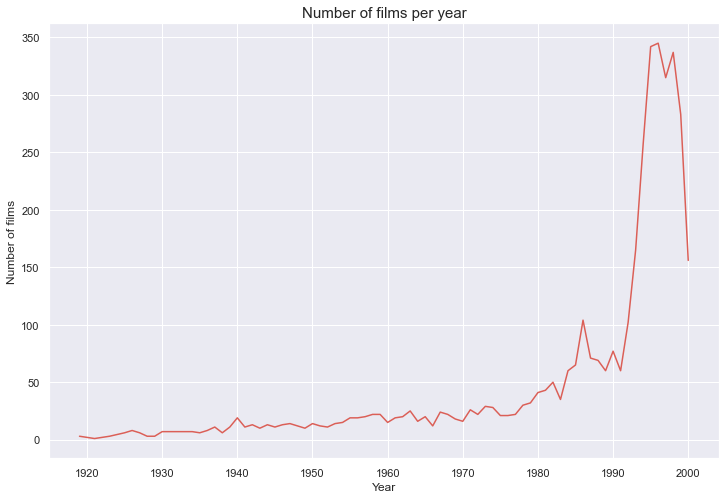

In [250]:
sns.lineplot(data=a, x="year", y="counts")
plt.title("Number of films per year", loc='center',fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Number of films')
plt.show()

In this database of films, the year with more films is 1995, with 345 (9% of total). The mínimum is 1921, with 1 film. The number of films increases drastically from 1994 to 2000 (the median is 1994 with 2010 films).

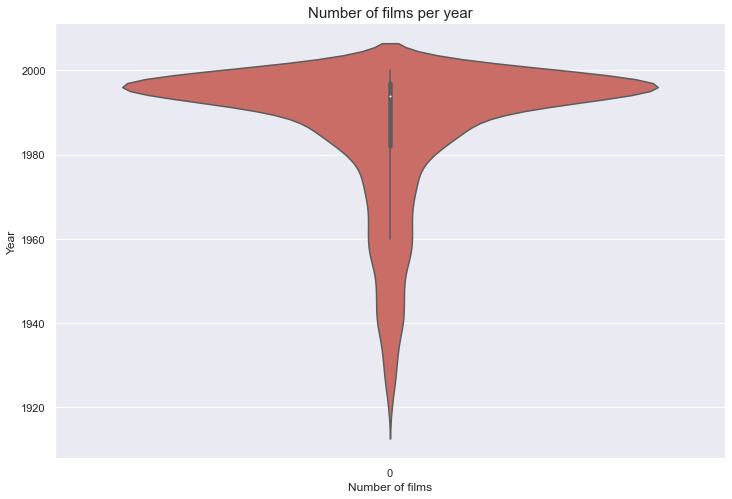

In [251]:
sns.violinplot(data=df['year'])
plt.title("Number of films per year", loc='center',fontsize = 15)
plt.ylabel('Year')
plt.xlabel('Number of films')
plt.show()

We can see again in a violin plot the distribution of films and its increase during the 90's.

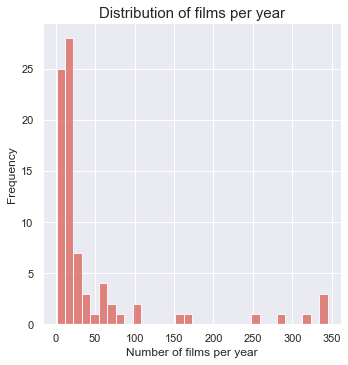

In [252]:
sns.displot(data=a, x='counts',  )
plt.title("Distribution of films per year", loc='center',fontsize = 15)
plt.xlabel('Number of films per year')
plt.ylabel('Frequency')
plt.show()


## Categorical variables

In this bar plot we can observe that in this database there are many years with very few films.

In [253]:
d= df['genre'].value_counts(normalize=True)
print (d)


Drama                         0.217100
Comedy                        0.134175
Horror                        0.045841
Comedy|Drama                  0.041720
Comedy|Romance                0.036570
                                ...   
Comedy|Crime|Horror           0.000258
Action|Sci-Fi|Thriller|War    0.000258
Action|Adventure|Western      0.000258
Comedy|Mystery|Thriller       0.000258
Comedy|Fantasy|Romance        0.000258
Name: genre, Length: 301, dtype: float64


In [254]:
# To extract multiple genre creating a matrix
dummy_df = df.genre.str.get_dummies(sep='|')
dummy_df.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [255]:
# Change children's name column
dummy_df.rename(columns = {dummy_df.columns[3]:'Children'}, inplace = True)


In [256]:
# Count by genre
data = dummy_df.apply(np.sum).sort_values(ascending=False).to_frame().reset_index()
data.columns =['genre', 'count']
data


,genre,count
0,Drama,1603
1,Comedy,1200
2,Action,503
3,Thriller,492
4,Romance,471
5,Horror,343
6,Adventure,283
7,Sci-Fi,276
8,Children,251
9,Crime,211


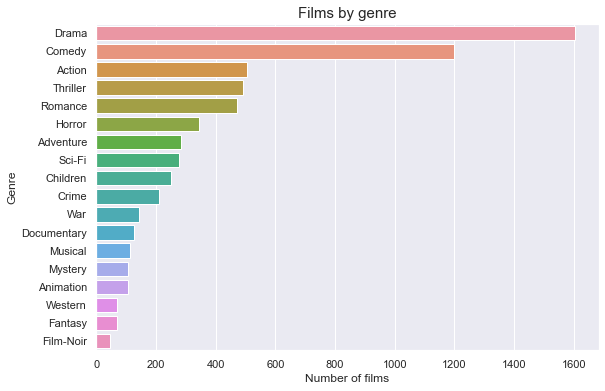

In [257]:
plt.figure(figsize =(9, 6))
sns.barplot(data=data, y='genre', x='count' )
plt.title("Films by genre", loc='center',fontsize = 15, )
plt.ylabel('Genre')
plt.xlabel('Number of films')
plt.show()

The most usual genres ara comedy and cction, followed by thriller and romance.

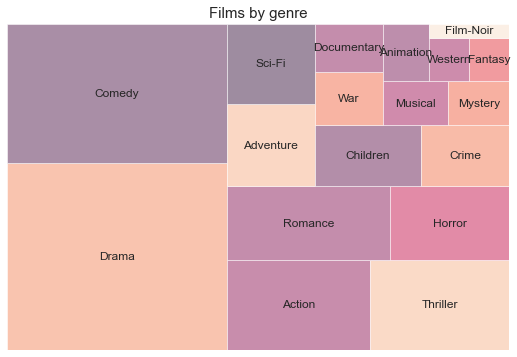

In [258]:
import squarify    #Import algorithm for treemap


plt.figure(figsize =(9, 6))
fig1=squarify.plot(sizes=data['count'], label=data['genre'], alpha=.5)
plt.axis("off")
plt.title("Films by genre",fontsize = 15)
plt.show()

The same distribution with a treemap.

## Categorical and numerical variables

In [259]:
#Contatenation of df by columns
df = df.join(dummy_df)
df.tail(2)

,id,title,genre,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3881,3951,Two Family House,Drama,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3882,3952,"Contender, The",Drama|Thriller,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [260]:
df.columns


Index(['id', 'title', 'genre', 'year', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [261]:
# Group by year
d=df.groupby(['year'])[['Action', 'Adventure', 'Animation', 'Children','Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']].sum().reset_index()
d


,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1919,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1,1920,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1922,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1923,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1996,37,22,7,20,115,23,19,150,5,2,12,7,6,48,14,45,8,1
77,1997,43,22,6,22,98,26,11,139,6,2,10,5,15,52,18,55,10,0
78,1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1
79,1999,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1


In [262]:
# Nearest 10 for decade start 
d['decade_start'] = (d['year'] // 10) * 10 + 1

# Adjust for years ending in zero 
d.loc[(d['year'] % 10) == 0, 'decade_start'] = d['decade_start'] - 10

# Calculate decade range
d['decade_range'] = d['decade_start'].astype('str') + ' - ' + \
                     (d['decade_start'] + 9).astype('str') 

In [263]:
# Create list by decade and genre
e=d.groupby('decade_range')[['Action', 'Adventure', 'Animation', 'Children','Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']].sum()
e

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
decade_range,,,,,,,,,,,,,,,,,,
1911 - 1920,1,1,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0
1921 - 1930,1,1,0,0,12,2,1,17,0,0,1,2,2,2,1,3,3,0
1931 - 1940,3,7,5,7,28,3,0,27,0,1,9,12,3,19,2,10,4,4
1941 - 1950,2,5,9,12,19,9,0,43,0,19,12,13,11,10,3,16,11,4
1951 - 1960,10,14,4,11,25,7,1,66,4,7,26,17,5,18,30,19,13,7
1961 - 1970,19,15,6,19,44,7,1,68,2,2,21,18,5,10,13,21,17,17
1971 - 1980,44,32,7,24,70,16,2,96,4,1,44,11,6,12,33,22,11,14
1981 - 1990,124,78,16,34,209,27,11,220,26,5,118,10,13,60,69,68,27,6
1991 - 2000,299,130,58,144,790,140,111,1064,32,9,112,31,61,340,125,333,57,16


In [264]:
e.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [265]:
e.index

Index(['1911 - 1920', '1921 - 1930', '1931 - 1940', '1941 - 1950',
       '1951 - 1960', '1961 - 1970', '1971 - 1980', '1981 - 1990',
       '1991 - 2000'],
      dtype='object', name='decade_range')

Text(0.5, 1.0, 'Number of films by genre and decade')

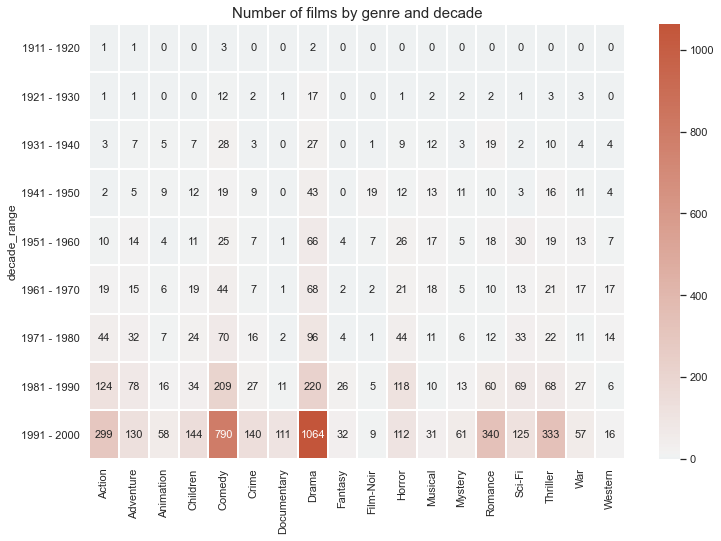

In [266]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(e,annot=True, annot_kws={"size": 11}, fmt='d', cmap=cmap, linewidths=1, linecolor="w", center=10)
plt.title("Number of films by genre and decade", loc='center',fontsize = 15, )


Drama and comedy are the more usual genres in the 90's.

In [267]:
# Reset index
f=e.reset_index()
f

,decade_range,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1911 - 1920,1,1,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0
1,1921 - 1930,1,1,0,0,12,2,1,17,0,0,1,2,2,2,1,3,3,0
2,1931 - 1940,3,7,5,7,28,3,0,27,0,1,9,12,3,19,2,10,4,4
3,1941 - 1950,2,5,9,12,19,9,0,43,0,19,12,13,11,10,3,16,11,4
4,1951 - 1960,10,14,4,11,25,7,1,66,4,7,26,17,5,18,30,19,13,7
5,1961 - 1970,19,15,6,19,44,7,1,68,2,2,21,18,5,10,13,21,17,17
6,1971 - 1980,44,32,7,24,70,16,2,96,4,1,44,11,6,12,33,22,11,14
7,1981 - 1990,124,78,16,34,209,27,11,220,26,5,118,10,13,60,69,68,27,6
8,1991 - 2000,299,130,58,144,790,140,111,1064,32,9,112,31,61,340,125,333,57,16


In [268]:
# Melt df to be able to plot it
g=f.melt(id_vars=['decade_range'], var_name="genre")
g

,decade_range,genre,value
0,1911 - 1920,Action,1
1,1921 - 1930,Action,1
2,1931 - 1940,Action,3
3,1941 - 1950,Action,2
4,1951 - 1960,Action,10
...,...,...,...
157,1951 - 1960,Western,7
158,1961 - 1970,Western,17
159,1971 - 1980,Western,14
160,1981 - 1990,Western,6


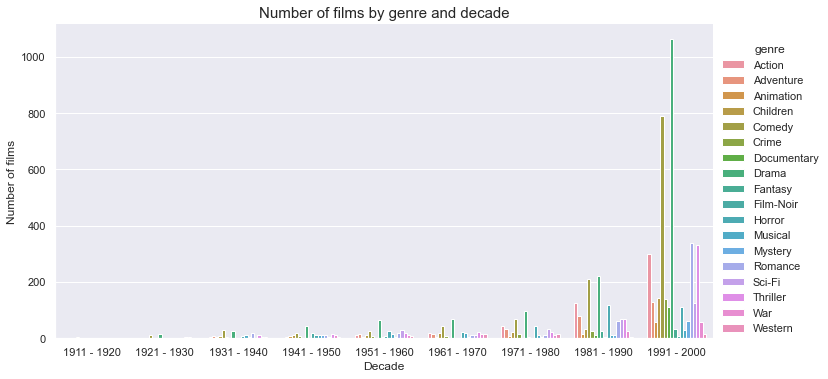

In [269]:
sns.catplot(x='decade_range', y= "value", kind="bar", hue='genre',data=g, aspect=2)
plt.title("Number of films by genre and decade", loc='center',fontsize = 15, )
plt.xlabel('Decade')
plt.ylabel('Number of films')
plt.show()

In [270]:
#Input

op_genre= ['Action', 'Adventure', 'Animation', 'Children', 'Crime',
       'Documentary', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

op_decade= ['1911 - 1920', '1921 - 1930', '1931 - 1940', '1941 - 1950',
       '1951 - 1960', '1961 - 1970', '1971 - 1980', '1981 - 1990']
  
# selecting rows based on condition (without drama and comedy)
sel_genre = g[g['genre'].isin(op_genre)]
# selecting rows based on condition ('1991-2000')
sel_both = sel_genre[sel_genre['decade_range'].isin(op_decade)]
sel_both

,decade_range,genre,value
0,1911 - 1920,Action,1
1,1921 - 1930,Action,1
2,1931 - 1940,Action,3
3,1941 - 1950,Action,2
4,1951 - 1960,Action,10
...,...,...,...
156,1941 - 1950,Western,4
157,1951 - 1960,Western,7
158,1961 - 1970,Western,17
159,1971 - 1980,Western,14


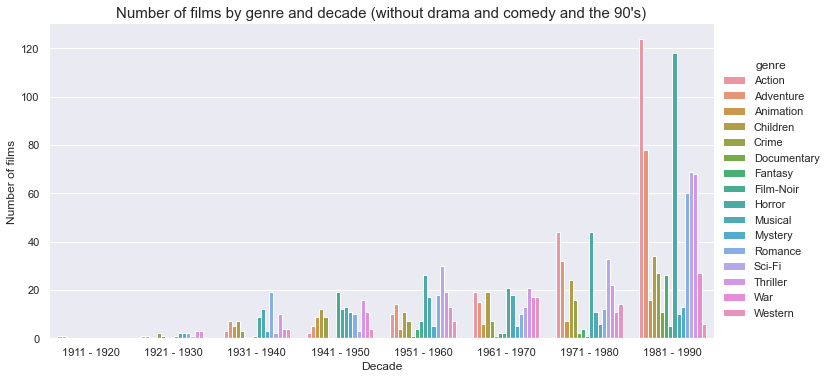

In [271]:
sns.catplot(x='decade_range', y= "value", hue='genre',data=sel_both, kind="bar", aspect=2)
plt.title("Number of films by genre and decade (without drama and comedy and the 90's)", loc='center',fontsize = 15, )
plt.xlabel('Decade')
plt.ylabel('Number of films')
plt.show()

To be able to see more clearly the evolution of genres by decades, we have supressed drama and comedy and the 90's. 

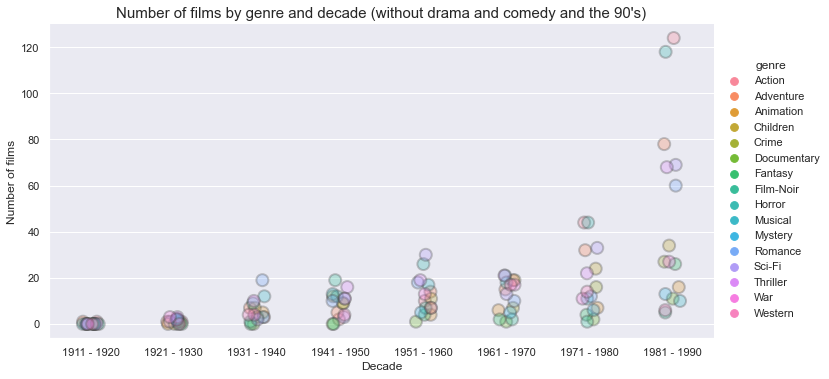

In [272]:
sns.catplot(x='decade_range', y= "value", hue='genre',data=sel_both, aspect=2, s=12, alpha=.3, linewidth=2)
plt.title("Number of films by genre and decade (without drama and comedy and the 90's)", loc='center',fontsize = 15, )
plt.xlabel('Decade')
plt.ylabel('Number of films')
plt.show()

Another plot with the same features.

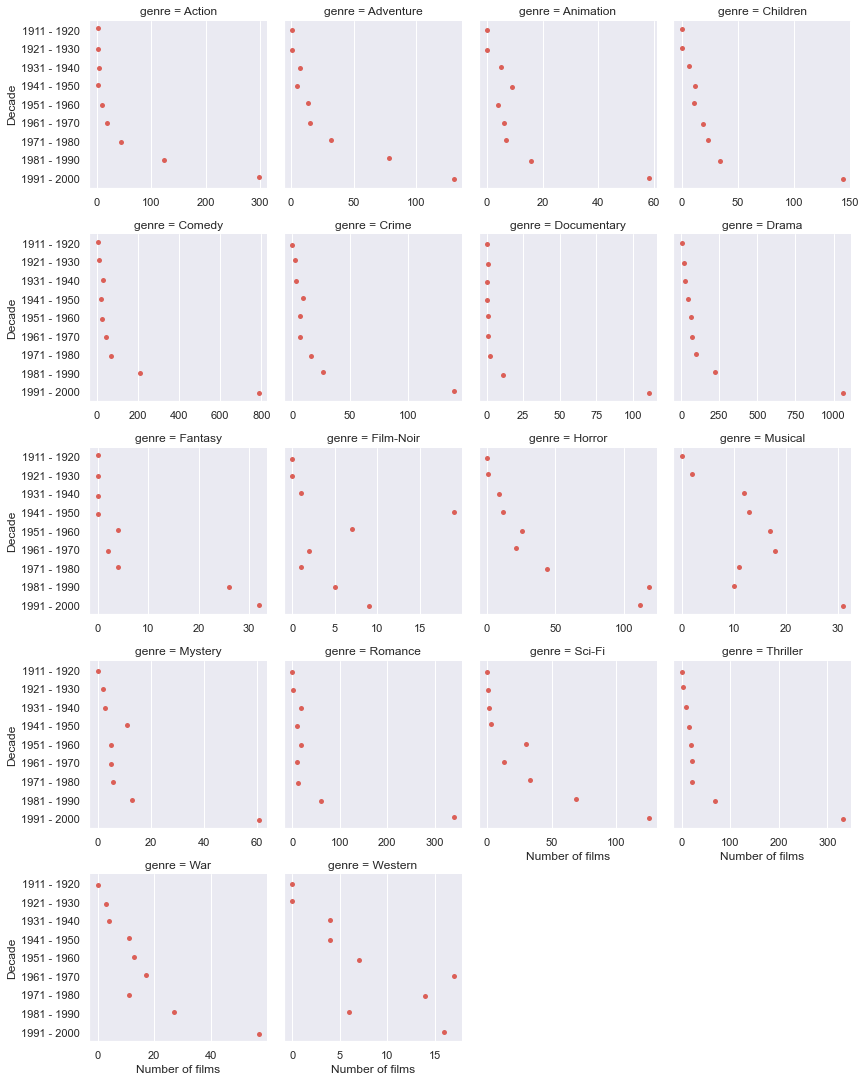

In [273]:
h= sns.FacetGrid(g, col="genre", col_wrap=4, sharex=False)
h.map_dataframe(sns.stripplot,x="value",y="decade_range");
h.set_axis_labels("Number of films", "Decade")


In [274]:
Evolution of each genre during time.

SyntaxError: invalid syntax (<ipython-input-274-a9ae83498f47>, line 1)

In [ ]:
# Stablish new palette 
sns.color_palette("Set2")
sns.set_theme(palette="Set2")

In [ ]:
k= sns.FacetGrid(g, col="decade_range", col_wrap=4, sharex=False)
k.map_dataframe(sns.stripplot,x="value",y="genre")
k.set_titles(col_template="Decade {col_name}")
k.set_axis_labels("Number of films", "Genre")
k.hue_kws

Number of films by genre for each decade. 